## Test Markdown for Task 1

We present a novel dataset based on Sentinel-2 satellite images covering <span style="color:blue; font-weight:bold;">13 spectral bands</span> and consisting out of <span style="color:blue; font-weight:bold;">10 classes with 2 to 3k per class</span> in total <span style="color:blue; font-weight:bold;">27,000 labeled and geo-referenced images</span>. We provide benchmarks for this novel dataset with its spectral bands using state-of-the-art deep Convolutional Neural Network (CNNs). With the proposed novel dataset, we achieved an overall classification accuracy of <span style="color:red; font-weight:bold;">98.57%</span>. The resulting classification system opens a gate towards a number of Earth observation applications. We demonstrate how this classification system can be used for detecting land use and land cover changes and how it can assist in improving geographical maps. The geo-referenced dataset EuroSAT is made publicly available here.

Things to understand:
- Spectral bands - different ranges of wavelengths of light that are captured by a satellite sensor
- 10 classes
- Labeled and geo-referenced images
- CNNs
- Why is land use and cover classification relevant?
- supervised machine learning
-  mutli-spectral image data provided by the Sentinel-2A satellite 

## Spectral Bands and Classes
<img title="a title" alt="Alt text" src="Images/spectral_bands.png" width="250" height="200"> <img title="a title" alt="Alt text" src="Images/sample_image_patches.png" width="350" height="200">

The three bands B01, B09 and B10 are intended to be used for the correction of atmospheric effects(e.g., aerosols, cirrus or water vapor). The remaining bands are primarily intended to identify and monitor land use and land cover classes.

## Classification Accuracy

<img title="a title" alt="Alt text" src="Images/classification_accuracy_train_test.png" width="600" height="250"> <img title="a title" alt="Alt text" src="Images/classification_accuracy_best.png" width="350" height="200"> <img title="a title" alt="Alt text" src="Images/classification_accuracy_resnet.png" width="200" height="200">

Notes
- The aim of land use and land cover classification is to automatically provide labels describing the represented physical land type or how a land area is used
- Data only covers EU countries
- In order to improve the chance of getting valuable image patches, we selected satellite images with a low cloud level. Besides the possibility to generate a cloud mask, ESA provides a cloud level value for each satellite image allowing to quickly select images with a low percentage of clouds covering the land scene

## Tips for High Marks
- Explore different models in sklearn beyond those covered in class
  - Describe conclusions
  - Use different metrics and see what you observe (Dont just add all, understand why and show it)
- Visualisation examples
    - Understand how well your model and feature selection works
    - Start with a qn -> hypotheses -> Then BAM
- Use functions as much as possible, minimal classes
- Print images, accuracies, etc as much as possible (So grader can glance)
- NO PANDAS
- Run and save notebook using Pickl (?) so on appear, they can see everything
- Technical mastery of module curriculum This include illustration/utilization of items like CV, proper training/testing protocols and
visualizations where appropriate.

## Dont's for Low Marks
- Perform pre-processing steps we haven't covered like noise/outlier removal
  - Wont get you additional marks
- Hyperparameter optimisation -> Explain I am trying to optimise this parameter, this is what it does, and these are the values ive tried
  - You can do this manually by looking at a range of values
  - Describe the quantities you are optimising
  - There are systematic methods like GridSearchCV, DONT USE! 

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score, KFold
from  sklearn.preprocessing import OneHotEncoder
from functions.pre_processing import *
from functions.transformations import *
from functions.feature_selection import *
from functions.classifiers import *
from sklearn.feature_selection import r_regression, SelectKBest
from sklearn.metrics import accuracy_score

In [2]:
x_train = np.load("datasets/x_train.npy")
x_test = np.load("datasets/x_test.npy")
y_train = np.load("datasets/y_train.npy")
y_test = np.load("datasets/y_test.npy")

# ((16200 rows, 512 cols) for x_train, (5400 rows, 512 cols) for x_test) | (16200,) -> Represents one dimensional array for y_train, (5400,) -> Represents one dimensional array for for y_test
# Train test split -> 75/25
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

# All values float

print(x_train) # 512 features -> Numerical features - Features with values that are continuous on a scale, statistical, or integer-related
print(np.unique(y_train)) # [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] -> 10 classes of possible outputs, and the reoccurences are just one of these values indicating a class

(16200, 512)
(5400, 512)
(16200,)
(5400,)
[[0.46573916 0.         0.         ... 0.15444896 0.02761412 0.        ]
 [0.         0.         0.         ... 0.42438483 0.08174433 0.0502976 ]
 [0.15436319 0.01907348 0.02712335 ... 0.         0.08633541 0.        ]
 ...
 [0.         0.22086209 0.07728773 ... 0.11481228 0.1169597  0.        ]
 [0.         0.         0.15300888 ... 0.         0.04044536 0.00111793]
 [0.0839657  0.         0.         ... 0.00469289 0.13740638 0.        ]]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


## Task 1

Write a Python program to pre-process and transform the dataset into a format suitable for developing machine learning models. Use pearson correlation method to identify ten most important features. Use these features to build a SVM classifier and evaluate your model’s performance.

<span style="font-weight:bold;">Save your response (program and markdown) as task1.ipynb.</span>

Missing Values in x_train -> 0, Missing Values in x_test -> 0
Negative Values in x_train -> 0, Negative Values in x_test -> 0
Missing Values in y_train -> 0, Missing Values in y_test -> 0
Negative Values in y_train -> 0, Negative Values in y_test -> 0


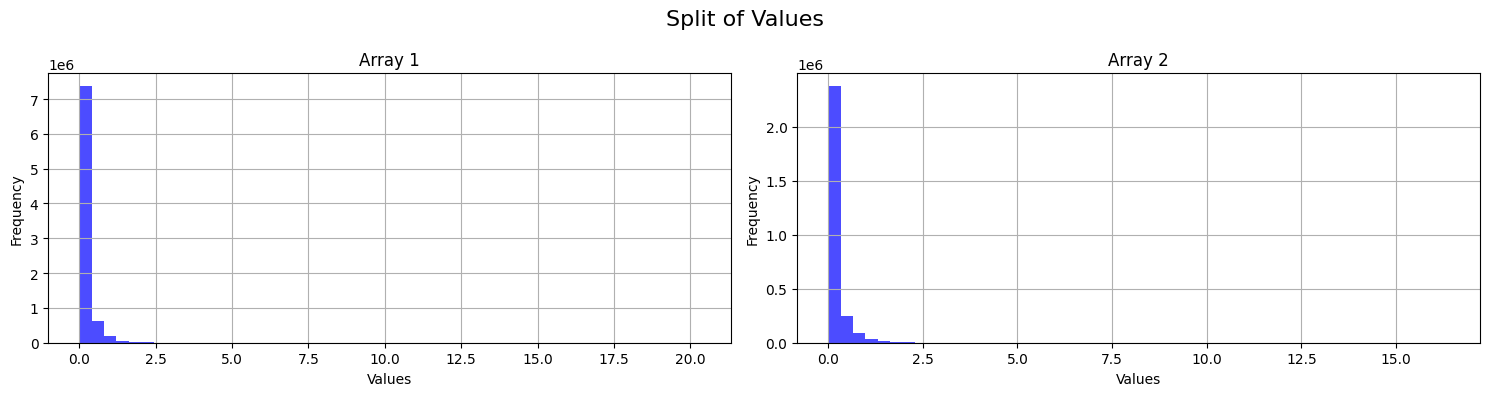

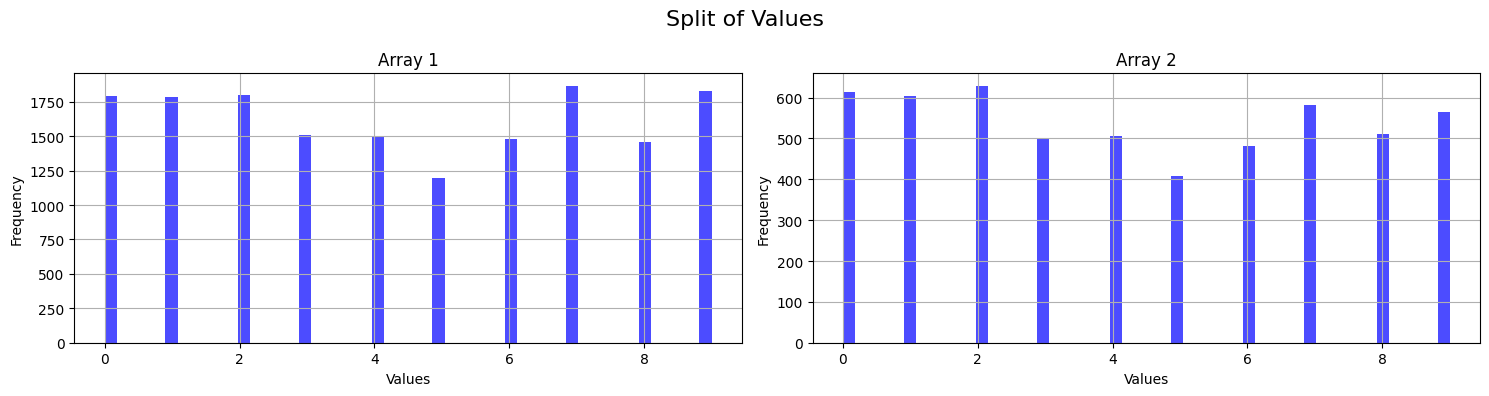

In [3]:
# ------- PRE PROCESSING [Fix Messed up Data] ---------
# PRE PROCESSING done on both training and test data
# Imputation -> (Univariate and Multivariate) -> process of inferring missing values based on the available data.

# Don't need OneHotEncoder or any other because all are float values
'''
Try different techniques of pre processing and transformation and see the difference in results?
'''

# Because there are no missing values, imputer not used
print(f"{find_missing_values(x_train, "x_train")}, {find_missing_values(x_test, "x_test")}")
print(f"{find_negative_values(x_train, "x_train")}, {find_negative_values(x_test, "x_test")}")

print(f"{find_missing_values(y_train, "y_train")}, {find_missing_values(y_test, "y_test")}")
print(f"{find_negative_values(y_train, "y_train")}, {find_negative_values(y_test, "y_test")}")
# Dont have any missing or negative values
plot_split_of_values([x_train, x_test])
plot_split_of_values([y_train, y_test])

# Variance Threshold?


## Because of no missing values, Imputation was not used

Pearson Classification Evaluation Table

<img title="a title" alt="Alt text" src="Images/pearson_evaluation.png" width="350" height="200">

[178 479 136 369 254 440  38 485 116  64]


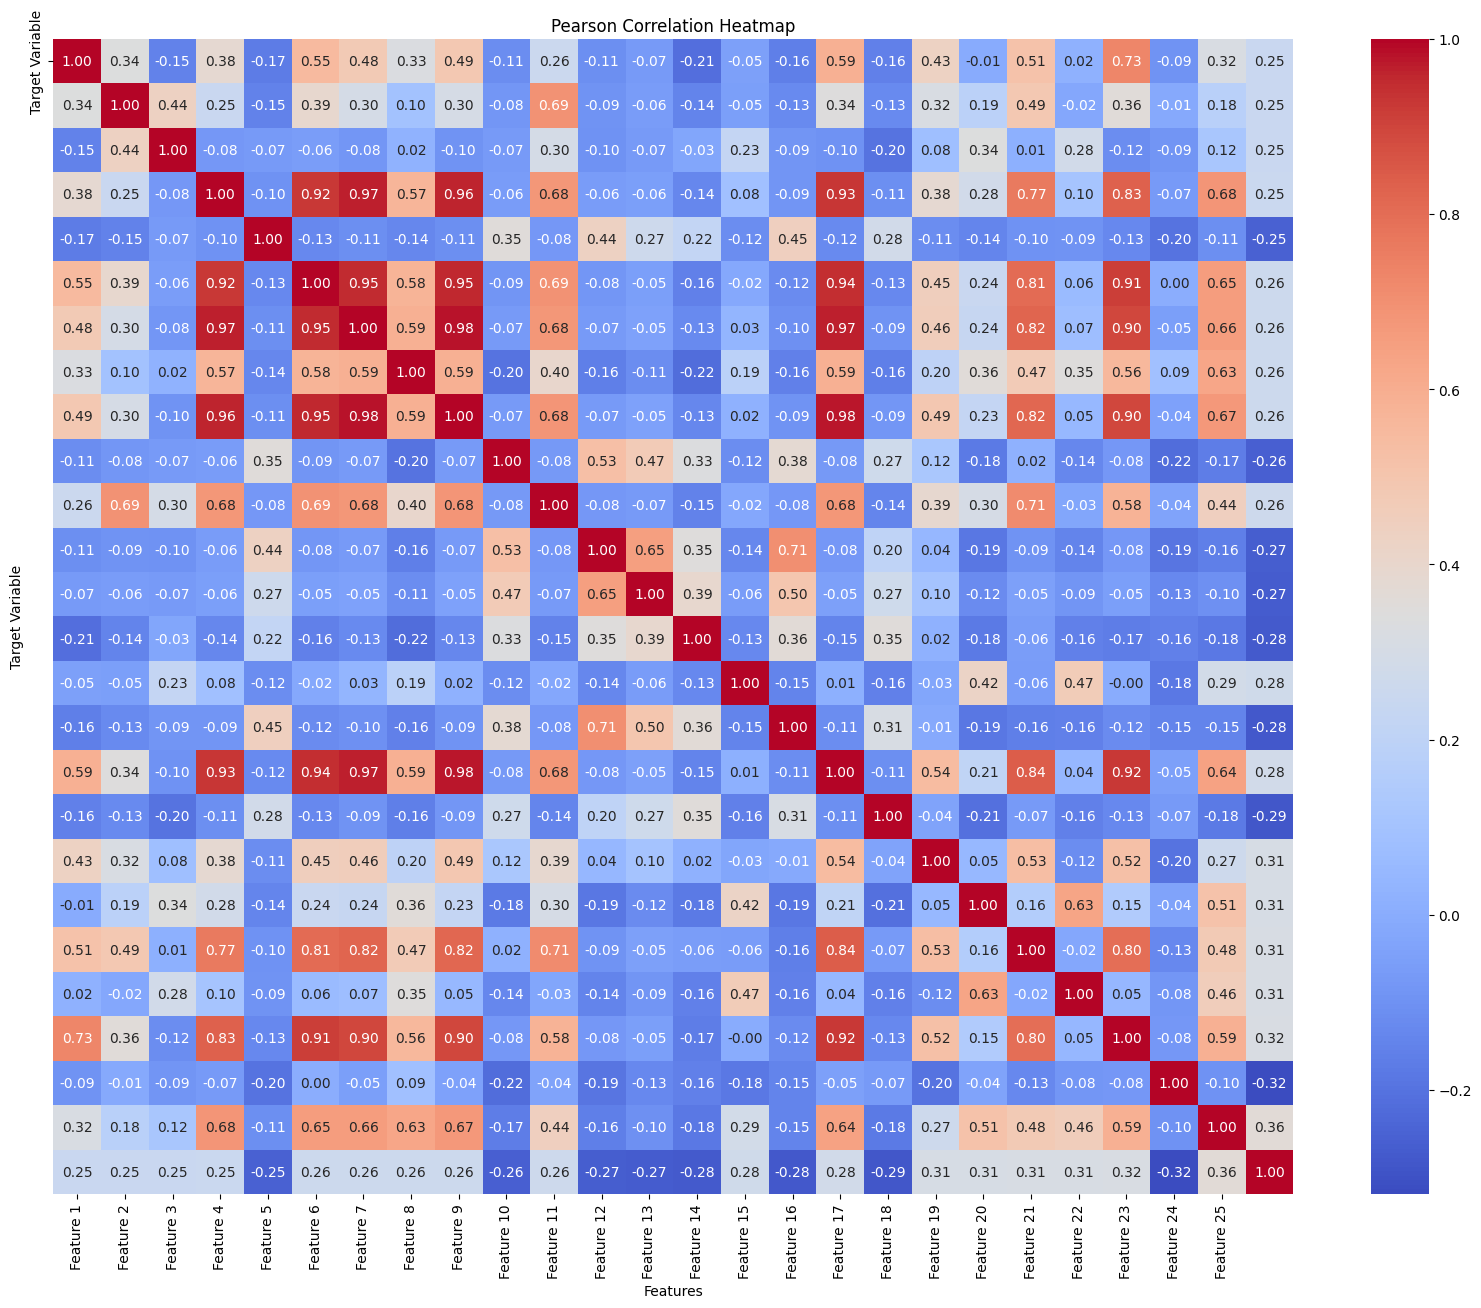

In [4]:
import seaborn as sns
# ------- TRANSFORMATION [Standardise it] ---------
# Normalisation -> Feature selection
# ------- FEATURE SELECTION -> PEARSON CLASSIFICATION [Helps estimate the importance of a feature] ---------

## WHY NORMALISATION BEFORE PR Coeffeciant & Feature Selection -> Normalization ensures that all features are on a similar scale, which can help prevent certain features from dominating the correlation calculations or feature selection process due to differences in their scales.
 # Is -1, 1 right?

# --------------- EVALUATE DIFFERENT NORMALISATION METHODS [BEST PERFORMANCE IS MinMaxScaler]

x_train_norm, x_test_norm = normalise_min_max(x_train, x_test)

# x_train_norm, x_test_norm = normalise_std_scaler(x_train, x_test)

# x_train_norm, x_test_norm = normalise_robust_scaler(x_train, x_test)
# -------------------------------------------------------

# ------- Any difference bwn SelectKBest and Pearson?
# skb = SelectKBest(r_regression, k=10)
# skb.fit(x_train, y_train)
# x_train_fit = skb.transform(x_train)
# x_test_fit = skb.transform(x_test)


# ----- Standard Scaler and MIN MAX SCALER DIFFERENCE

# Take a look at the correlation values

feature_correlation = pearson_correlation(x_train_norm, y_train)
print(feature_correlation[:10])

# data = feature_correlation[:10]
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(data)), data)
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title('Bar chart of each value mapped')
# plt.show()

top_features_indices = feature_correlation[-25:]
selected_features = x_train_norm[:, top_features_indices]
correlation_matrix = np.corrcoef(selected_features.T, y_train)

# Create heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=['Feature {}'.format(i) for i in range(1, len(top_features_indices)+1)], yticklabels=['Target Variable'])
plt.title('Pearson Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Target Variable')
plt.show()

# correlation_matrix = np.corrcoef(x_train_norm, rowvar=False)

# Min - -0.318938080678068
# Max - 0.3630486169457985

# ----------------------------------------------------------------

# One-Hot Encoding -> The categorical feature is not ordinal 
# Label and Ordinal Encoding -> The categorical feature is ordinal (Like JR, SR, high school)


In [5]:
# What does the C hyperparameterisation do?
# What parameters can be optimised in SVC

# ----- Show how this figure was gotten in terms of parameters to get the best output
# --------- Holdout method

svc_results = svc_classifier(x_train_norm, x_test_norm, y_train, y_test, feature_correlation, 10)
print(svc_results)

# CROSS VALIDATION AND K-FOLD VALIDATION NEEDED 

# ------------------------------------------------------------------------------------

# normal dataset
    # All features
        # Training Accuracy:  0.9711111111111111
        # Testing Accuracy:  0.9283333333333333
    # Top 10 features
        # Training Accuracy:  0.5820987654320988
        # Testing Accuracy:  0.5507407407407408

# normalised dataset [better with normalisation]
    # All features (rbf)
        # Training Accuracy:  0.9761728395061728
        # Testing Accuracy:  0.9305555555555556
    # Top 10 features ------ BEST SO FAR -------
        #  ----- RBF (no C)
        # Training Accuracy:  0.5920987654320987
        # Testing Accuracy:  0.5607407407407408


        # NOT USING RBF DUE TO OVERFITTING (Large difference between training and test)
        # kernel -> rbf | C -> 7 + StandardScaler  
        # Training Accuracy:  0.6462345679012346
        # Testing Accuracy:  0.5648148148148148

        # kernel -> rbf | C -> 50 + StandardScaler -> Overfitting
        # Training Accuracy:  0.7183950617283951
        # Testing Accuracy:  0.5592592592592592   

        # --------------------------------
        # Linear -> C= 15
        # Training Accuracy:  0.49679012345679013
        # Testing Accuracy:  0.49092592592592593


In [16]:
svc_scores = cross_val_score(svc, selected_features, y_train, cv=10)
print(svc_scores.mean(), svc_scores.std())

0.5587037037037037 0.01397149644816429


In [10]:
kernels = ['linear', 'rbf', 'sigmoid']
# After using 47 features -- Seems to be the sweet spot
# Training Accuracy: 0.9052469135802469
# Testing Accuracy: 0.8333333333333334
for i in range(75, 100):
    svc_results = svc_classifier(x_train_norm, x_test_norm, y_train, y_test, feature_correlation, i)
    print(f"After using {i} features")
    print(svc_results)



        # svc = SVC(C=float(i), kernel='rbf') # Why poly and how does it work
        # selected_features = x_train_norm[:, feature_correlation[:10]]
        # selected_test_features = x_test_norm[:, feature_correlation[:10]]
        # svc.fit(selected_features, y_train)
        # svc.score(selected_test_features, y_test) 
        # # print(f'kernel -> linear | C -> {i}')
        # print('Training Accuracy: ', svc.score(selected_features, y_train))
        # print('Testing Accuracy: ', svc.score(selected_test_features, y_test))
        # print('-----------------------')

After using 75 features
Training Accuracy: 0.9397530864197531
Testing Accuracy: 0.8668518518518519
After using 76 features
Training Accuracy: 0.9405555555555556
Testing Accuracy: 0.8681481481481481
After using 77 features
Training Accuracy: 0.9409259259259259
Testing Accuracy: 0.8718518518518519
After using 78 features
Training Accuracy: 0.9430864197530864
Testing Accuracy: 0.8772222222222222
After using 79 features
Training Accuracy: 0.942037037037037
Testing Accuracy: 0.8781481481481481
After using 80 features
Training Accuracy: 0.9429012345679012
Testing Accuracy: 0.8770370370370371
After using 81 features
Training Accuracy: 0.9442592592592592
Testing Accuracy: 0.8788888888888889
After using 82 features
Training Accuracy: 0.944320987654321
Testing Accuracy: 0.8831481481481481
After using 83 features
Training Accuracy: 0.9449382716049383
Testing Accuracy: 0.8835185185185185
After using 84 features
Training Accuracy: 0.9461728395061728
Testing Accuracy: 0.882962962962963
After using 8

<span style="font-weight: bold;">Markdown Question: </span>The difficulty in using pearson correlation method for feature selection is determining the appropriate number of features to select. The method described in the module to automatically choose the appropriate number of features will be computationally very expensive when the number of features is high. Describe an alternative method to reduce the computational complexity of the method discussed in class for datasets with large number of features. Describe the method. No need to write the program.

In [9]:
# What is the method that auto chooses the appropriate features?
# https://scikit-learn.org/stable/modules/outlier_detection.html & Standardisation try